In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mlptools.io.read import read_from_n2p2_data

# path2target = path2target = "/home/y1u0d2/result/n2p2/Si/95/cut_3.77"
path2target = path2target = "/Users/y1u0d2/desktop/Lab/result/n2p2/Si/98/data"
mlpatoms = read_from_n2p2_data(path2target)

/Users/y1u0d2/opt/anaconda3/envs/mlp/lib/python3.11/site-packages/ovito/_extensions/averaging.py:2: UserWarning: Did you accidentally install the OVITO package from the PyPI repository in an Anaconda/Miniconda Python interpreter using the 'pip' command? This will likely lead to conflicts with existing libraries in the Anaconda environment, and import of the OVITO module may fail with an error related to the Qt framework. To fix this, please uninstall the ovito pip package by running 'pip uninstall -y ovito PySide6' and then install the OVITO Anaconda package provided by OVITO GmbH. Visit https://docs.ovito.org/python/introduction/installation.html for further instructions. If you would rather like to ignore this warning message, add the following code to the top of your Python script:

  import warnings
  warnings.filterwarnings('ignore', message='.*OVITO.*PyPI')

  import ovito._extensions.pyscript


0 / 81668
1000 / 81668
2000 / 81668
3000 / 81668
4000 / 81668
5000 / 81668
6000 / 81668
7000 / 81668
8000 / 81668
9000 / 81668
10000 / 81668
11000 / 81668
12000 / 81668
13000 / 81668
14000 / 81668
15000 / 81668
16000 / 81668
17000 / 81668
18000 / 81668
19000 / 81668
20000 / 81668
21000 / 81668
22000 / 81668
23000 / 81668
24000 / 81668
25000 / 81668
26000 / 81668
27000 / 81668
28000 / 81668
29000 / 81668
30000 / 81668
31000 / 81668
32000 / 81668
33000 / 81668
34000 / 81668
35000 / 81668
36000 / 81668
37000 / 81668
38000 / 81668
39000 / 81668
40000 / 81668
41000 / 81668
42000 / 81668
43000 / 81668
44000 / 81668
45000 / 81668
46000 / 81668
47000 / 81668
48000 / 81668
49000 / 81668
50000 / 81668
51000 / 81668
52000 / 81668
53000 / 81668
54000 / 81668
55000 / 81668
56000 / 81668
57000 / 81668
58000 / 81668
59000 / 81668
60000 / 81668
61000 / 81668
62000 / 81668
63000 / 81668
64000 / 81668
65000 / 81668
66000 / 81668
67000 / 81668
68000 / 81668
69000 / 81668
70000 / 81668
71000 / 81668
72000

In [6]:
# plot energy
energy_df = pd.DataFrame([[atom.get_atomic_energy(), atom.get_atomic_volume(), atom.structure_id, atom.n_atoms] for atom in mlpatoms],
    columns=['energy', 'volume', 'structure_id', 'n_atoms'])

In [15]:
energy_df.loc[energy_df['structure_id'] == 'amorphous']['n_atoms'].min(), energy_df.loc[energy_df['structure_id'] == 'amorphous']['n_atoms'].max()

(15, 109)

In [4]:
blacklist = ['mp-three', 'mp-four', 'mp-149_dimer', 'mp-slab']
energy_df = energy_df[~energy_df['structure_id'].isin(blacklist)]

<Axes: xlabel='volume', ylabel='energy'>

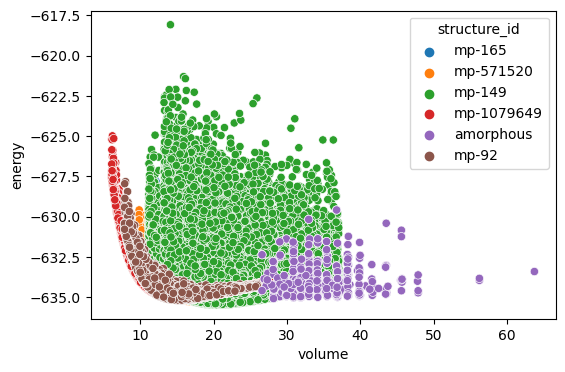

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=energy_df, x='volume', y='energy', hue='structure_id')

In [6]:
dimers = [atom for atom in mlpatoms if atom.n_atoms == 2]

In [ ]:
dimer_energy = [[dimer.get_atomic_distance(), dimer.get_atomic_energy()] for dimer in dimers]
dimer_energy_df = pd.DataFrame(dimer_energy, columns=['distance', 'energy'])
dimer_energy_df.sort_values(by='distance', inplace=True)
dimer_energy_df.reset_index(drop=True, inplace=True)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(dimer_energy_df['distance'], dimer_energy_df['energy'], marker='o')
ax.set_xlabel('distance (ang)')
ax.set_ylabel('energy (eV)')
ax.set_title('Si dimer')

In [ ]:
# plot force
force_df = []
for atom in mlpatoms:
    tmp_df = pd.DataFrame(atom.force, columns=['fx', 'fy', 'fz'])
    tmp_df['structure_id'] = atom.structure_id
    force_df.append(tmp_df)

force_df = pd.concat(force_df, ignore_index=True)

In [ ]:
sns.scatterplot(data=force_df, x='fx', y='fy', hue='structure_id')

In [17]:
atom = mlpatoms[0]

In [20]:
# get elements from list randomly
from random import sample
sample(mlpatoms, 10)

In [45]:
import random

rdf_x = atom.get_rdf(rcut=6.0, bins=200)[:, 0]
rdf_val_list = []
for atom in mlpatoms:
    rdf_val = atom.get_rdf(rcut=6.0, bins=200)[:, 1]
    rdf_val_list.append(rdf_val)
rdf_val_list = np.array(rdf_val_list)

(0.0, 1.5)

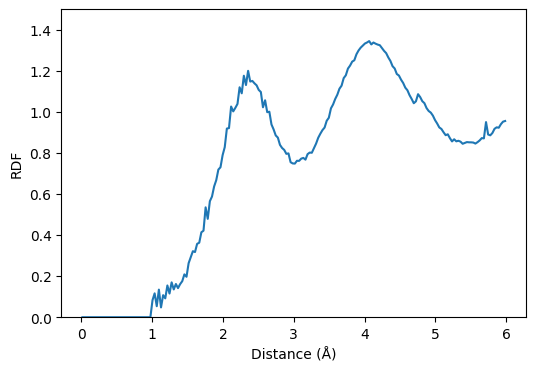

In [48]:
mean_rdf = np.mean(rdf_val_list, axis=0)
std_rdf = np.std(rdf_val_list, axis=0)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(rdf_x, mean_rdf)
# ax.fill_between(rdf_x, mean_rdf - std_rdf, mean_rdf + std_rdf, alpha=0.3)
ax.set_xlabel('Distance (Å)')
ax.set_ylabel('RDF')
ax.set_ylim(0, 1.5)